In [1]:
#Kyle Prerost
#PHYS 404
#HW 4
#February 9rd, 2019

In [2]:
import numpy as np
import matplotlib.pylab as py

def mycos(x, n):
    cos = 0.0
    prev = 1
    cos = prev
    for i in range(2,n+1):
        curr = prev*(-x*x)/(2*i-2)/(2*i-3)
        cos = cos + curr
        prev = curr
        if abs(curr/cos)<1.e-16:
            #print('The series expansion calculated using only', i, 'terms, as it was limited by machine precision')
            #Remove this # to see how many terms were used (off for next question)
            return cos
    return cos
print(mycos(24,60))
print(np.cos(24))

0.424179058922628
0.424179007336997


[1e-16, 1e-15, 1.0000000000000002e-14, 1.0000000000000002e-13, 1.0000000000000002e-12, 1.0000000000000001e-11, 1.0000000000000002e-10, 1.0000000000000003e-09, 1.0000000000000004e-08, 1.0000000000000004e-07, 1.0000000000000004e-06, 1.0000000000000004e-05, 0.00010000000000000005, 0.0010000000000000005, 0.010000000000000005, 0.10000000000000006]
[0.0, 0.11102230246251554, 0.0, 0.0011102230246251565, 0.00011102230246251565, 1.1102230246251565e-05, 0.0, 2.220446049250313e-07, 0.0, 1.1102230246251565e-09, 1.1102230246251565e-10, 2.220446049250313e-11, 1.1102230246251565e-12, 1.1102230246251565e-13, 2.220446049250313e-14, 1.1102230246251565e-15]


D:\Python\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


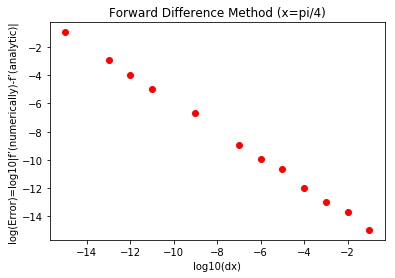

In [7]:
dxArray=[]
dxArraylog=[]
dx=1.0*10**-16
for i in range(0,16):
    dxArray.append(dx)
    dxArraylog.append(np.log10(dx))
    dx=dx*10
print(dxArray)
x=np.pi/4

def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx
def fwderimycos(x,dx):
    return (mycos(x+dx,1000)-mycos(x,1000))/dx
    
fwError=[]
fwErrorlog=[]
for i in range(0,16):
    error = (np.absolute(fwderimycos(x,dxArray[i])-derifw(np.cos,x,dxArray[i])))
    fwError.append(error)
    fwErrorlog.append(np.log10(error))
print(fwError)

py.title('Forward Difference Method (x=pi/4)')
py.xlabel('log10(dx)')
py.ylabel('log(Error)=log10|f’(numerically)-f’(analytic)|')
py.plot(dxArraylog,fwErrorlog,'ro')
py.show()
#n=16 and the optimal value for dx seems to be 0.1

[0.0, 0.0, 0.02220446049250313, 0.0011102230246251565, 0.00033306690738754696, 0.0, 1.1102230246251565e-06, 0.0, 1.1102230246251565e-08, 1.1102230246251565e-09, 1.1102230246251565e-10, 1.1102230246251565e-11, 1.1102230246251565e-12, 2.220446049250313e-13, 2.220446049250313e-14, 3.3306690738754696e-15]


D:\Python\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


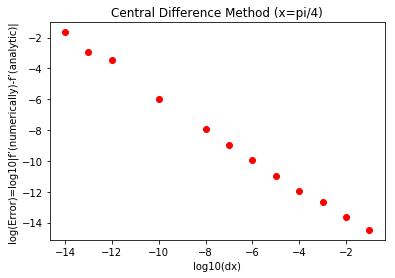

In [4]:
def dericd(y,x,dx):
    return ((y(x+dx/2)-y(x-dx/2))/dx)
def cdderimycos(x,dx):
    return (mycos(x+dx/2,1000)-mycos(x-dx/2,1000))/dx

cdError=[]
cdErrorlog=[]
for i in range(0,16):
    error = (np.absolute(cdderimycos(x,dxArray[i])-dericd(np.cos,x,dxArray[i])))
    cdError.append(error)
    cdErrorlog.append(np.log10(error))
print(cdError)

py.title('Central Difference Method (x=pi/4)')
py.xlabel('log10(dx)')
py.ylabel('log(Error)=log10|f’(numerically)-f’(analytic)|')
py.plot(dxArraylog,cdErrorlog,'ro')
py.show()
#this scheme is better as it requires larger dx to reach machine precision error

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


D:\Python\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


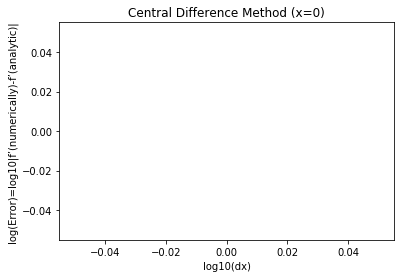

In [5]:
x=0.0
def dericd(y,x,dx):
    return ((y(x+dx/2)-y(x-dx/2))/dx)
def cdderimycos(x,dx):
    return (mycos(x+dx/2,1000)-mycos(x-dx/2,1000))/dx

cdError=[]
cdErrorlog=[]
for i in range(0,16):
    error = (np.absolute(cdderimycos(x,dxArray[i])-dericd(np.cos,x,dxArray[i])))
    cdError.append(error)
    cdErrorlog.append(np.log10(error))
print(cdError)

py.title('Central Difference Method (x=0)')
py.xlabel('log10(dx)')
py.ylabel('log(Error)=log10|f’(numerically)-f’(analytic)|')
py.plot(dxArraylog,cdErrorlog,'ro')
py.show()
#with x=0 it seems like the numerical and analytic method produce the same result